# Multi-label classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

In [3]:
PATH = 'data/planet/'

In [4]:
ls {PATH}

models/  sample_submission_v2.csv  test-jpg/  tmp/  train-jpg/  train_v2.csv


In [6]:
from fastai.plots import *

In [7]:
def get_first(path): return glob(f'{path}/*.*')[0]

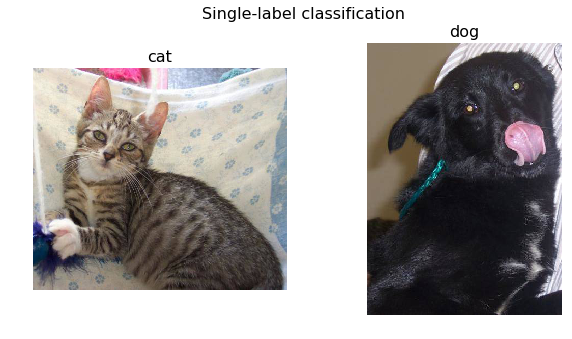

In [8]:
dc_path = 'data/dogscats/valid/'
list_paths = [get_first(f'{dc_path}cats'), get_first(f'{dc_path}dogs')]
plots_from_files(list_paths, titles=['cat', 'dog'], maintitle='Single-label classification')

# Multi-label models for Planet dataset

In [9]:
from planet import f2

In [10]:
metrics = [f2]
model = resnet34

In [22]:
label_csv = f'{PATH}train_v2.csv'
val_idxs = get_cv_idxs(len(list(label_csv)) - 1)

In [23]:
def get_data(image_size):
    tfms = tfms_from_model(model, image_size, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, tfms=tfms, suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

In [24]:
data = get_data(256)

In [25]:
x, y = next(iter(data.val_dl))

In [26]:
y



Columns 0 to 12 
    0     0     0     0     0     0     0     0     0     0     1     0     1
    1     0     0     0     0     1     0     0     1     0     0     0     1
    1     0     0     0     0     1     0     0     1     0     0     0     1
    0     0     0     0     0     1     0     0     0     0     0     0     1

Columns 13 to 16 
    0     0     0     0
    0     0     0     0
    1     0     0     0
    0     0     0     0
[torch.cuda.FloatTensor of size 4x17 (GPU 0)]

In [27]:
list(zip(data.classes, y[0]))

[('agriculture', 0.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 0.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 1.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 0.0),
 ('water', 0.0)]

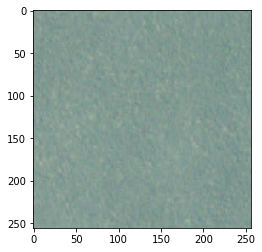

In [32]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4)

In [33]:
sz = 64

In [34]:
data = get_data(sz)

In [35]:
data = data.resize(int(sz * 1.3), 'tmp')

In [36]:
learn = ConvLearner.pretrained(model, data, metrics=metrics)

epoch      trn_loss   val_loss   f2                          
    0      0.224359   0.210018   0.927273  



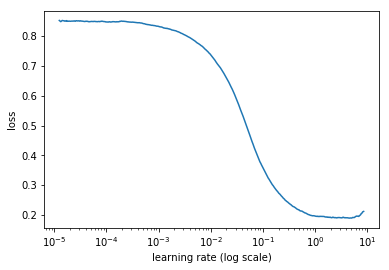

In [37]:
learn.lr_find()
learn.sched.plot()

In [38]:
lr = 0.2

In [39]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                          
    0      0.150612   0.095038   0.927273  
    1      0.140158   0.087458   0.935606                    
    2      0.138622   0.084283   0.935606                    
    3      0.136336   0.087584   0.935606                    
    4      0.134552   0.084966   0.935606                    
    5      0.135788   0.084302   0.935606                    
    6      0.130991   0.082465   0.935606                    



[array([0.08246]), 0.9356060606060607]

In [40]:
lrs = np.array([lr / 9, lr / 3, lr])

In [41]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                          
    0      0.117852   0.079092   0.923701  
    1      0.114516   0.109458   0.923701                    
    2      0.106592   0.079462   0.923701                    
    3      0.113883   0.05946    0.965368                    
    4      0.101879   0.0824     0.923701                    
    5      0.102241   0.068456   0.935606                     
    6      0.098256   0.07526    0.935606                     



[array([0.07526]), 0.9356060606060607]

In [42]:
learn.save(f'{sz}')

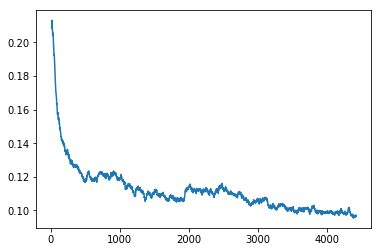

In [44]:
learn.sched.plot_loss()

In [45]:
sz = 128

In [46]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                           
    0      0.100049   0.102929   0.833333  
    1      0.097005   0.112084   0.833333                     
    2      0.097552   0.096527   0.935606                     
    3      0.097102   0.092694   0.935606                     
    4      0.096208   0.099205   0.935606                     
    5      0.094442   0.088524   0.935606                     
    6      0.094706   0.091808   0.935606                     



[array([0.09181]), 0.9356060606060607]

In [47]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                           
    0      0.092599   0.093728   0.935606  
    1      0.094847   0.090843   0.935606                     
    2      0.086963   0.088914   0.935606                     
    3      0.093192   0.088412   0.935606                     
    4      0.089742   0.073172   0.935606                     
    5      0.086907   0.077191   0.935606                     
    6      0.081559   0.081981   0.935606                     



[array([0.08198]), 0.9356060606060607]

In [48]:
learn.save(f'{sz}')

In [49]:
sz = 256

In [50]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                           
    0      0.090572   0.091673   0.935606  
    1      0.088636   0.089059   0.935606                     
    2      0.087576   0.095176   0.935606                     
    3      0.088496   0.086945   0.935606                     
    4      0.085968   0.082637   0.935606                     
    5      0.088068   0.083399   0.935606                     
    6      0.09061    0.091682   0.935606                     



[array([0.09168]), 0.9356060606060607]

In [51]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                           
    0      0.085154   0.07509    0.935606  
    1      0.087175   0.069071   0.935606                     
    2      0.083444   0.071921   0.935606                     
    3      0.08596    0.05856    0.977273                     
    4      0.083228   0.062436   0.935606                     
    5      0.082595   0.061607   0.935606                     
    6      0.079685   0.067414   0.935606                     



[array([0.06741]), 0.9356060606060607]

In [52]:
learn.save(f'{sz}')

In [54]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [55]:
f2(preds, y)

0.9356060606060607